## <b> Evaluation Project 10 Insurance Claims- Fraud Detection </b>
<b><em> By: Mr.Lokesh Baviskar </em></b>

<b><em> Batch: 1833 </em></b>

## <b>Problem Statement:</b>

<b><em>Business case:
    
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
    </em></b>

#### In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

<b>Note: Use the link below to reach to your dataset. 

Downlaod Files:</b>
    
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [82]:
# Importing Insurance Claims dataset Csv file using pandas
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [83]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 1000
No of Columns: 40


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [84]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Statistical Analysis

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset. </b>

In [5]:
df.duplicated('policy_number').sum() # This will check if any duplicate entry or duplicate row with same policy_number

0

<b> Let check if any whitespace, 'NA' or '-' exist in dataset. </b>

In [6]:
df.isin([' ','NA','-']).sum().any()

False

In [85]:
df.isin(['?']).sum().any()

True

<b> Let replace '?' with np.NaN </b>

In [86]:
df=df.replace('?',np.NaN)

## Missing value check 

In [87]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
auto_make                                 0             0.0
vehicle_claim                             0             0.0
capital-gains                             0             0.0
insured_relationship                      0             0.0
insured_hobbies                           0             0.0
insured_occupation                        0             0.0
insured_education_level                   0             0.0
insured_sex                               0             0.0
insured_zip                               0             0.0
umbrella_limit                            0             0.0
policy_annual_premium                     0             0.0
policy_deductable                       

#### Comment :
- 'property_damage','police_report_available','collision_type' contain missing values.
- _c39 columns with 100 % null value. We gone drop it.
- Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.

#### Missing value imputation

In [88]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [89]:
# Droping unnecessary columns
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

#### Missing value check after imputation

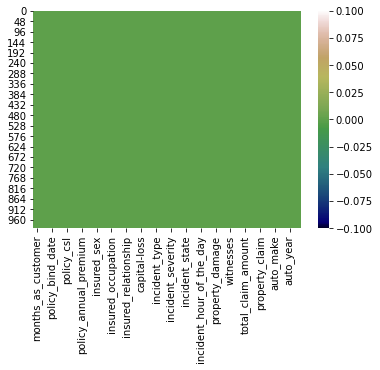

In [90]:
# Heatmap of missing value
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

#### Comment :
<b> Finally, No Missing Value is Present.

We are Now Yes To Go Further !!!</b>

#### Something details on Policy_csl column :
- <b>Combined single limit (CSL):</b>
 CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability    coverage and Property Damage Liability coverage per occurrence or accident.
- In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.
- <b> We will split this column into two CSL columns for person and accident.</b>

In [91]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [92]:
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

<b> We have two feature here with datetime datatypes. We gone split them in terms of date,month and year.</b>

In [93]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [94]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [95]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [96]:
# Incident year for all data is 2015 so we gone drop it.
df.drop(['incident_year'],axis=1,inplace=True)

<b> We have one column name as 'auto_year' which depict year from which Automobile in operational on road. In simple word Automobile age. Here we will do some simple feature engineering to create new columns with automobile age and drop eariler.</b>

<b> As incident year is 2015, we will use 2015 as base year for new column creation.

In [97]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

<b> Spliting feature in categorical and numerical variable </b>

In [98]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [99]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

### Statistical Matrix

In [22]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.000000,203.954000,115.113174,0.000000,115.750000,199.500000,276.250000,479.000000
age,1000.000000,38.948000,9.140287,19.000000,32.000000,38.000000,44.000000,64.000000
policy_deductable,1000.000000,1136.000000,611.864673,500.000000,500.000000,1000.000000,2000.000000,2000.000000
policy_annual_premium,1000.000000,1256.406150,244.167395,433.330000,1089.607500,1257.200000,1415.695000,2047.590000
umbrella_limit,1000.000000,1101000.000000,2297406.598118,-1000000.000000,0.000000,0.000000,0.000000,10000000.000000
capital-gains,1000.000000,25126.100000,27872.187708,0.000000,0.000000,0.000000,51025.000000,100500.000000
capital-loss,1000.000000,-26793.700000,28104.096686,-111100.000000,-51500.000000,-23250.000000,0.000000,0.000000
incident_hour_of_the_day,1000.000000,11.644000,6.951373,0.000000,6.000000,12.000000,17.000000,23.000000
number_of_vehicles_involved,1000.000000,1.839000,1.018880,1.000000,1.000000,1.000000,3.000000,4.000000
bodily_injuries,1000.000000,0.992000,0.820127,0.000000,0.000000,1.000000,2.000000,2.000000


In [23]:
df[Category].describe().T.style.background_gradient(cmap='summer_r')

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,5,Police,292


#### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [24]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumpi

### Start exploring Target variable

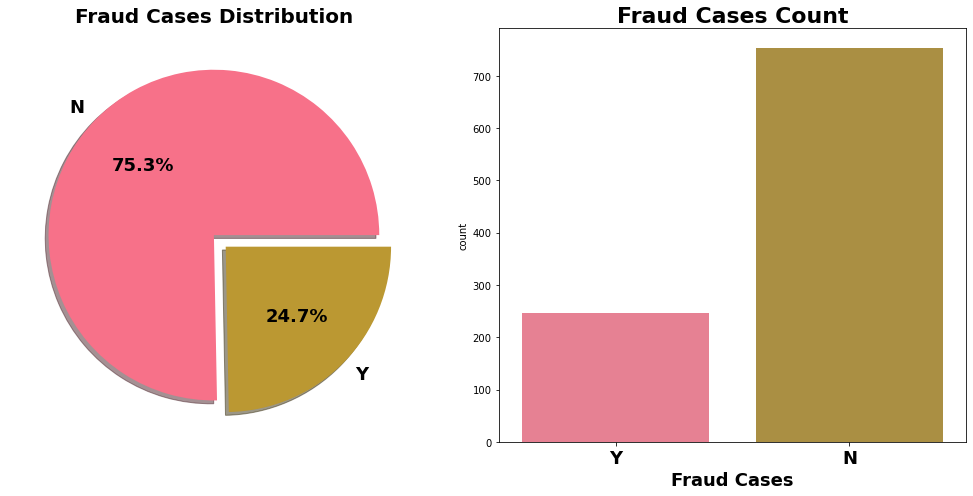

In [20]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Fraud Cases Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
- Out of all cases around 24.7 % cases are Fraud.
- 'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

### Start Exploring target variable against Independent features to gain more insight.


###  Analysing Age vs Fraud

In [41]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


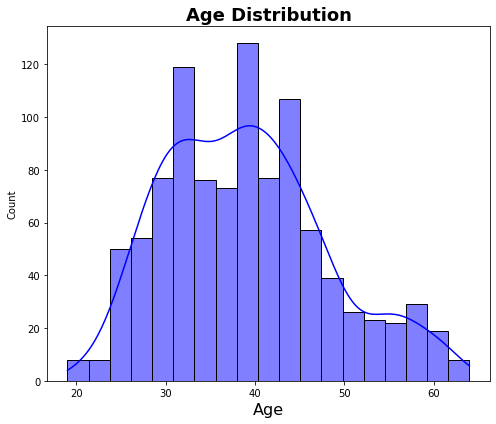

In [48]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [38]:
# Spliting age in different age range
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

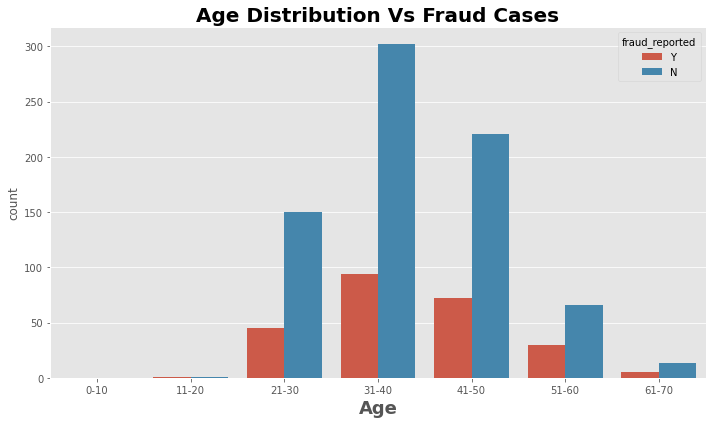

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

#### Observation:
- Maximum fraud cases comes from people with age group of 31-50 year.
- Very few cases in 60+ year old peoples.

### Policy State Vs Fraud cases

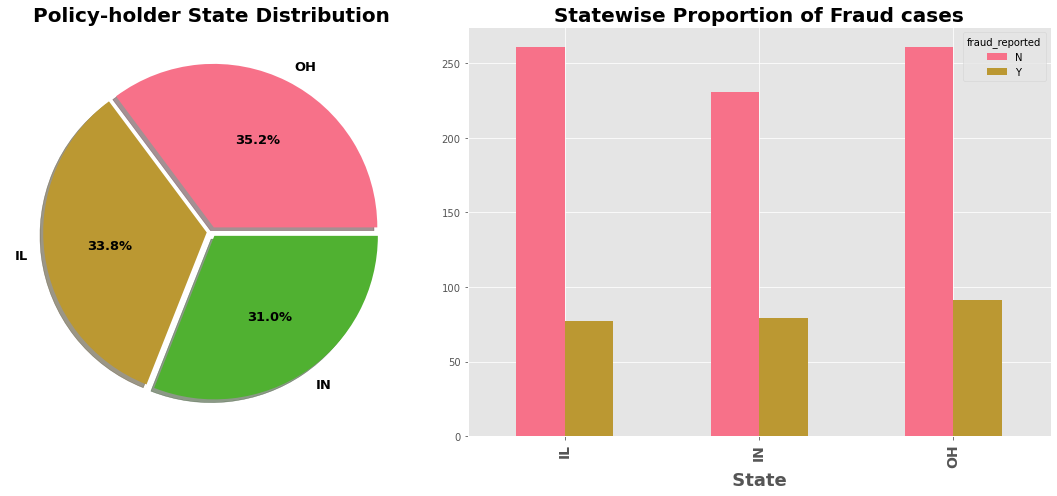

In [96]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- Almost same amout of cases come from each state.
- Maximum fraud cases come from state of Ohio.

### Insured Gender VS Fraud cases

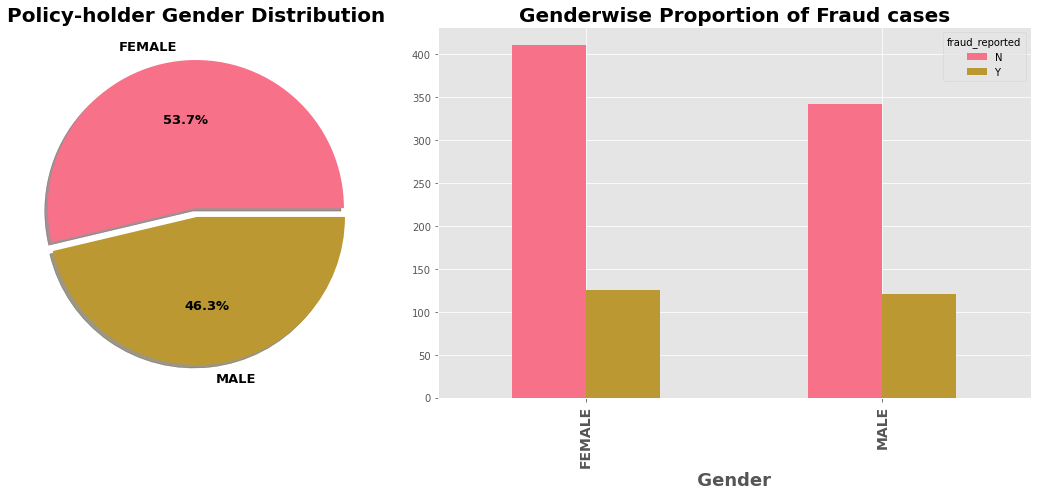

In [101]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Comment :
- Number of claims come from female is higher than which reported by male insured.
- Almost same amount of fraud cases comes from same gender.

### Education_level vs Fraud cases

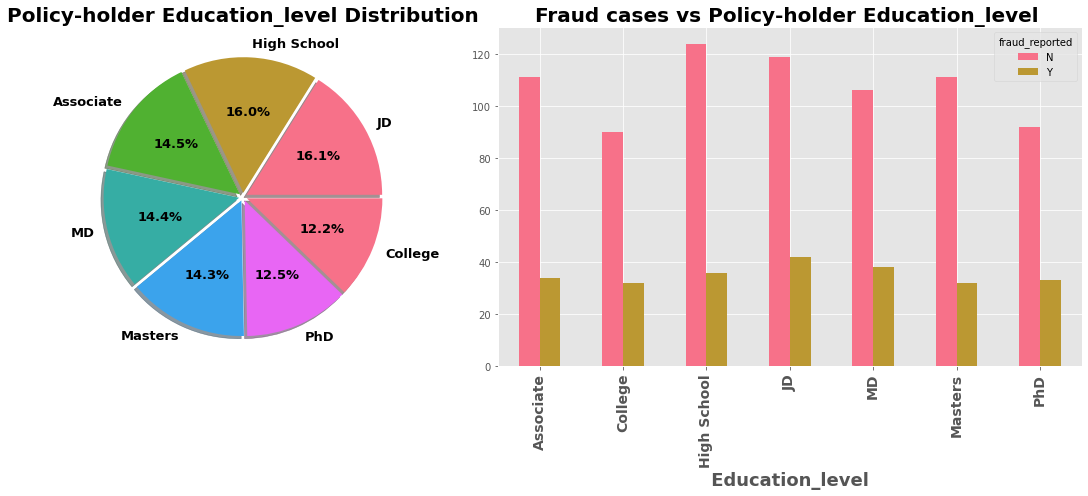

In [104]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Comment :
<b> We can see tendency to make fraud claims has across every education backgroud, even in Masters,PhD. 
Education Level is not much important variable for us !!! </b>

### Occupation of Insured Customers

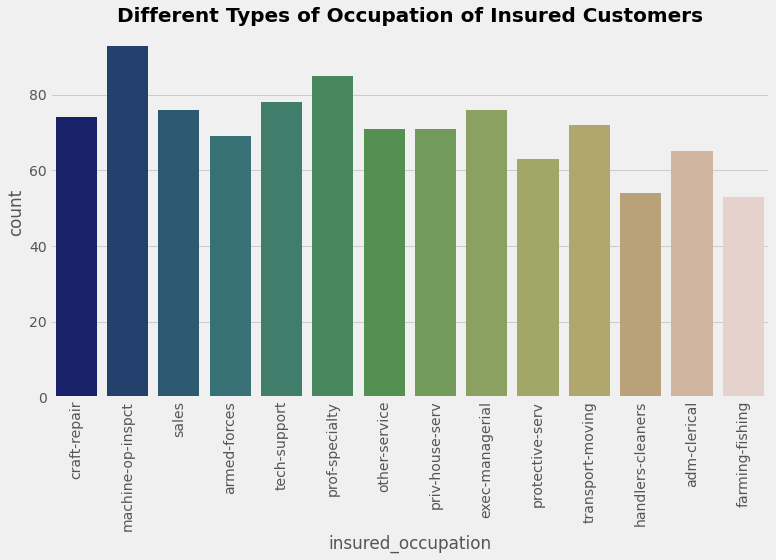

In [110]:
# let's check the insured occupation
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

### Hobbies of Insured Customers

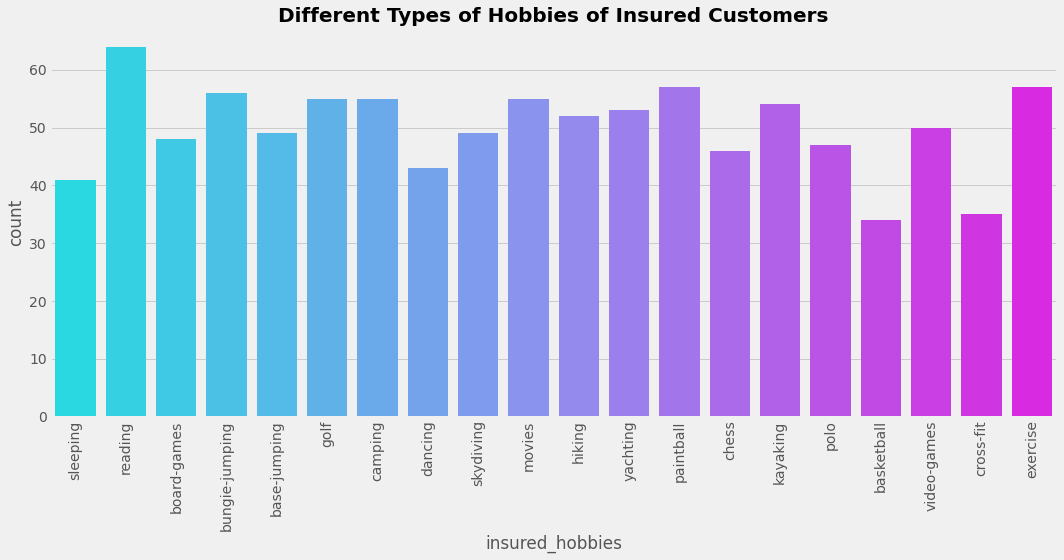

In [111]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 

### Different Types of Incidents Vs Fraud cases

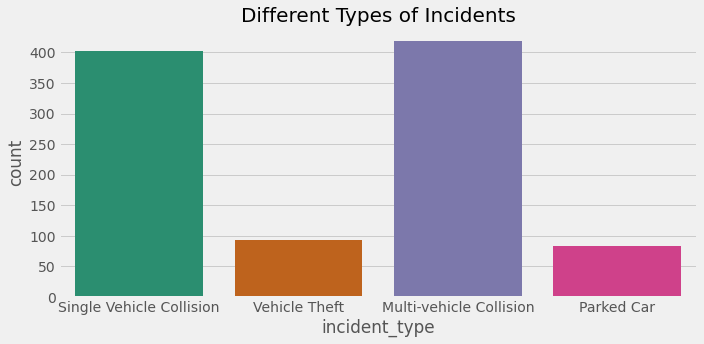

In [129]:
# let's check the incident types
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

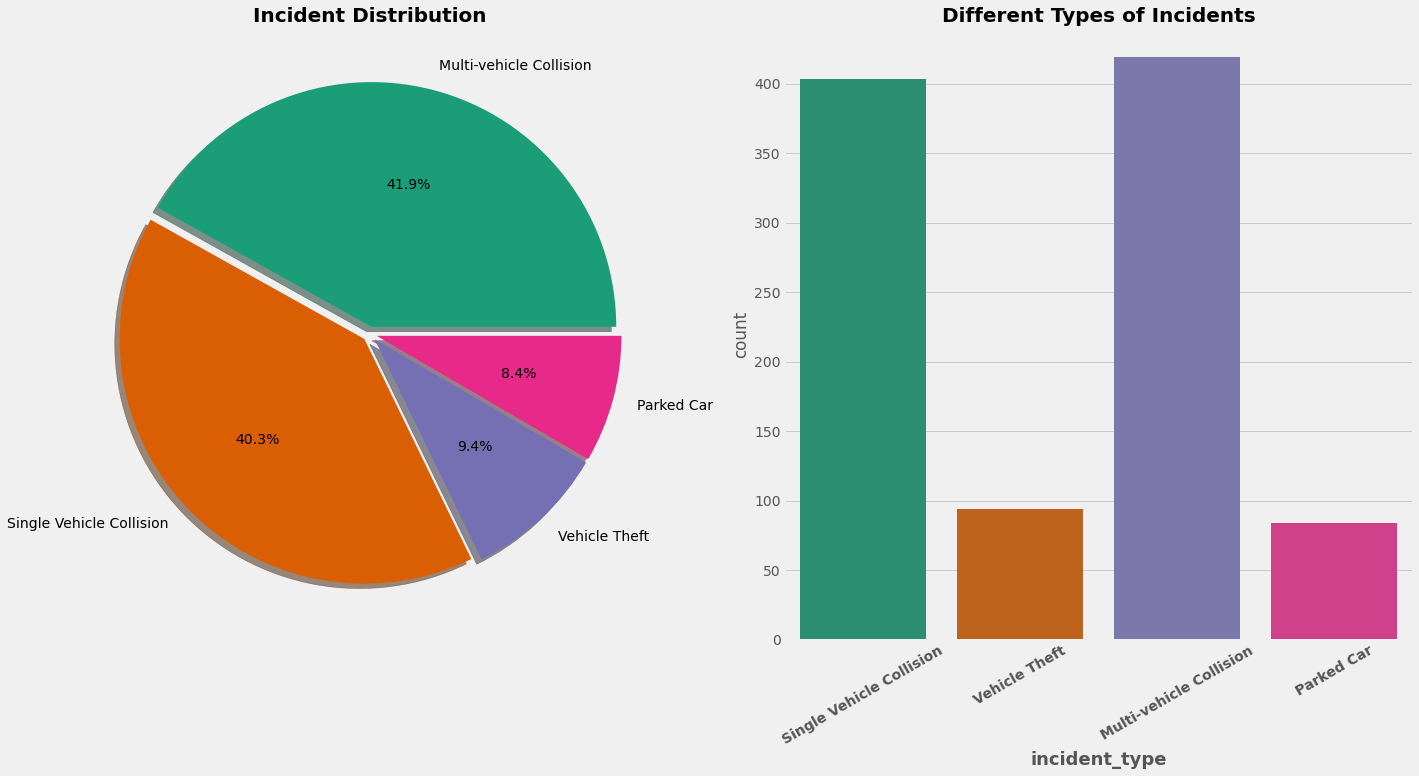

In [141]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
df['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%3.1f%%',
                                          textprops ={ 'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('incident_type',data=df,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.tight_layout()
plt.show()

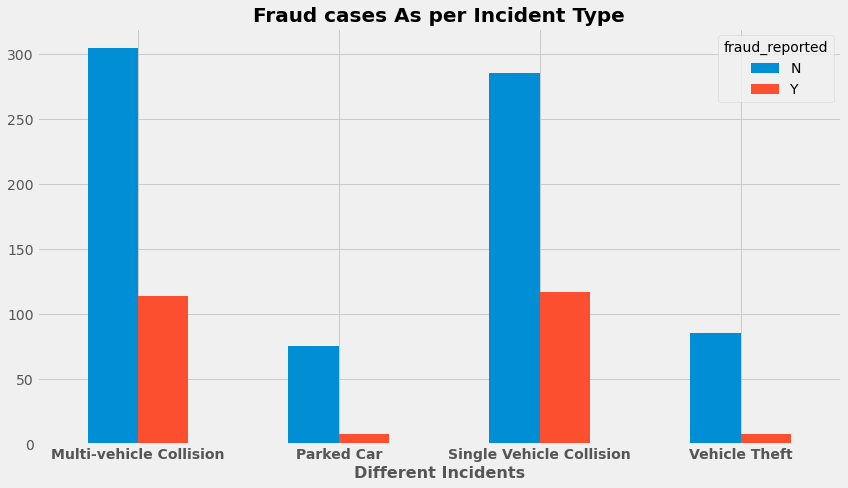

In [151]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

#### Observation :
- Most of case comes from Multi-vehicle and single vehicle collision.
- Some claims are due to automobile robbery.
- <b> <u> One claim out of three claim is fraud </u> in multi or single vehicle collision incident.</b>

<b><em> It will be interesting to figure out collision type and severity for different incident and corresponding fraud claim. </em></b>

### Exploration of  different Collision 

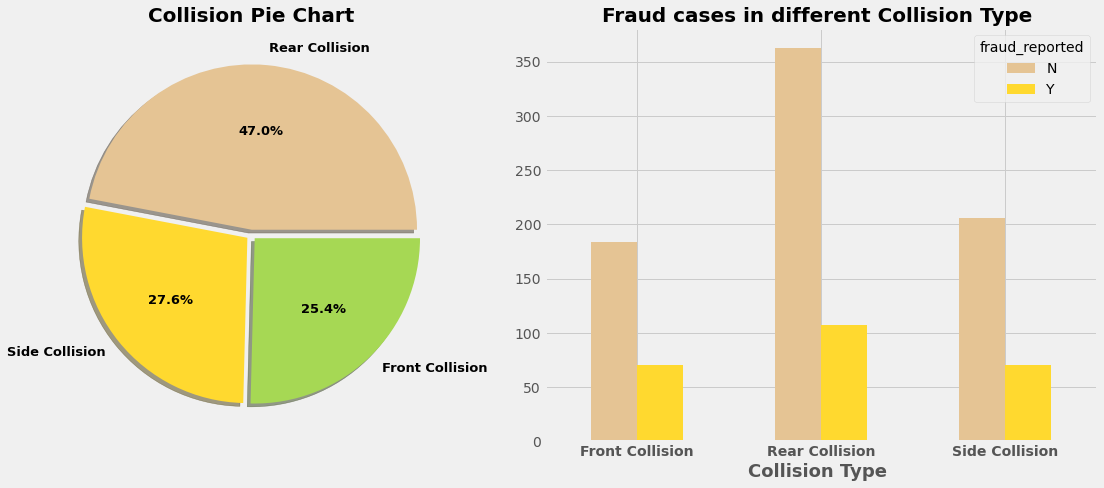

In [169]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

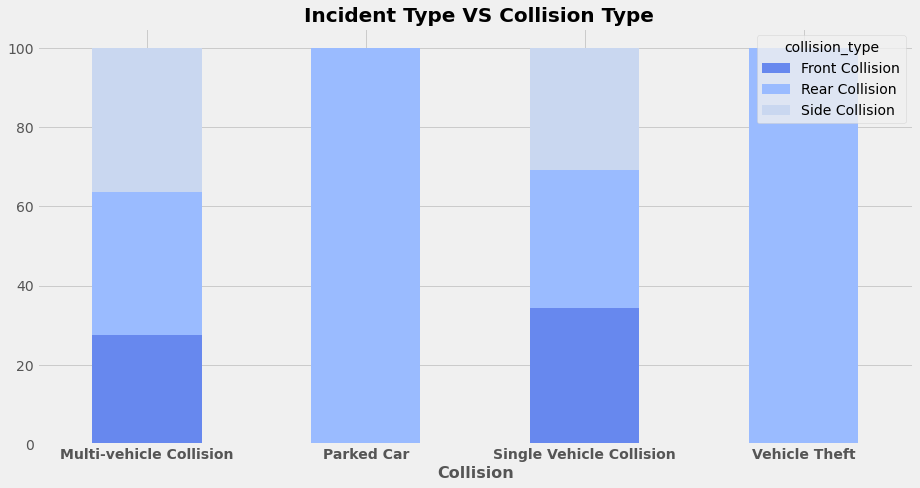

In [176]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

### Collision VS Incident Severity

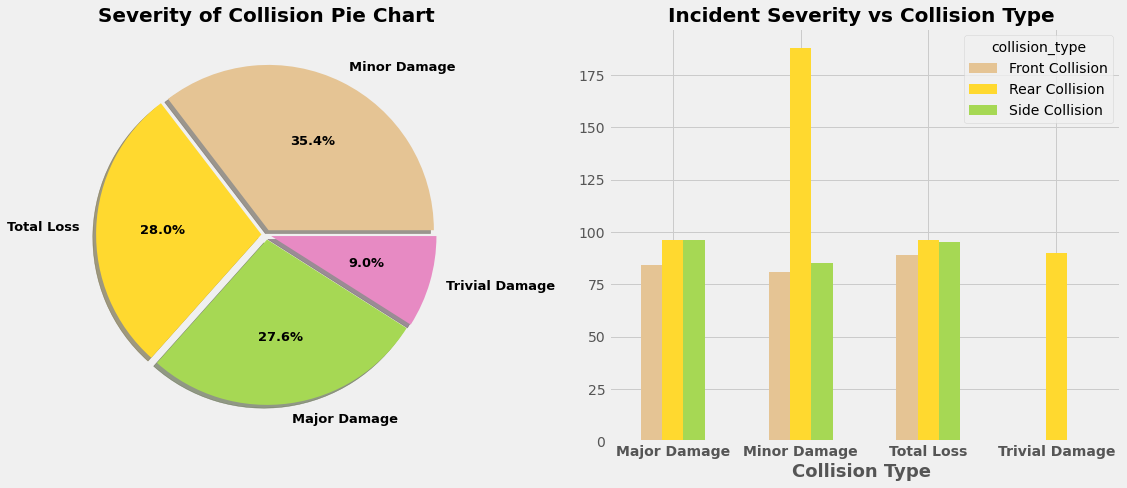

In [167]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Let check another plot of Incident Type VS Severity of collision to gain more insight.

In [177]:
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='summer_r')

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
incident_type,,,,
Multi-vehicle Collision,144,130,145,0
Parked Car,0,42,0,42
Single Vehicle Collision,132,136,135,0
Vehicle Theft,0,46,0,48


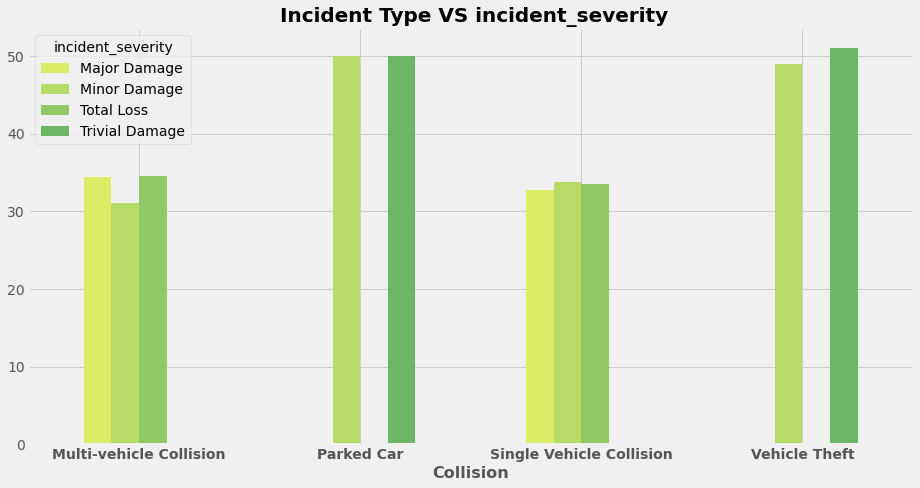

In [178]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

### It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.

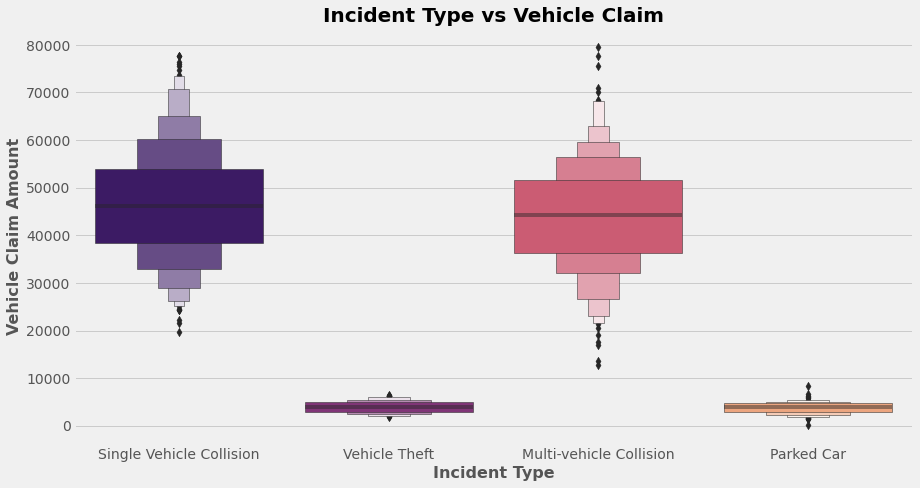

In [193]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(df['incident_type'], df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

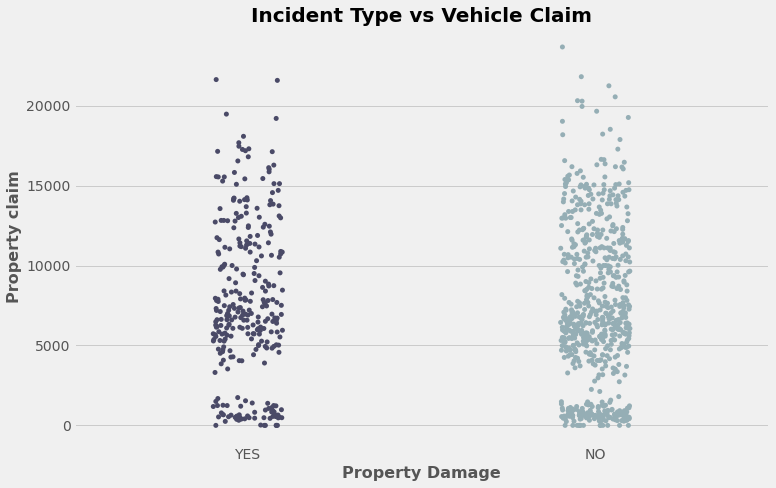

In [188]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

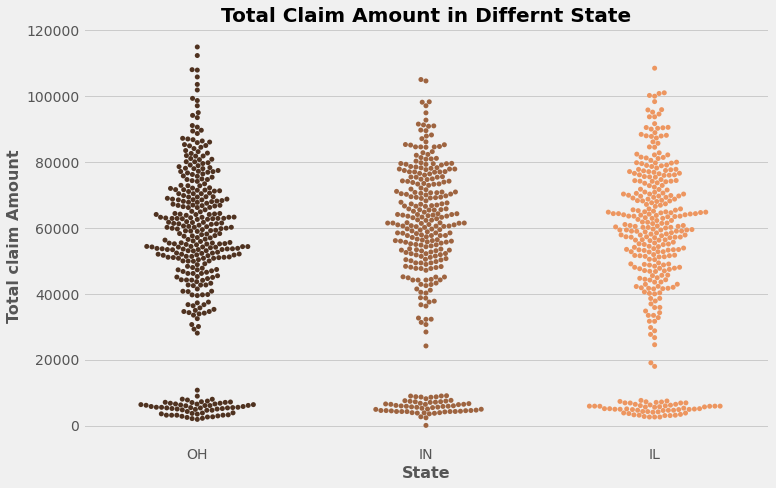

In [190]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=16,fontweight='bold')
plt.show()

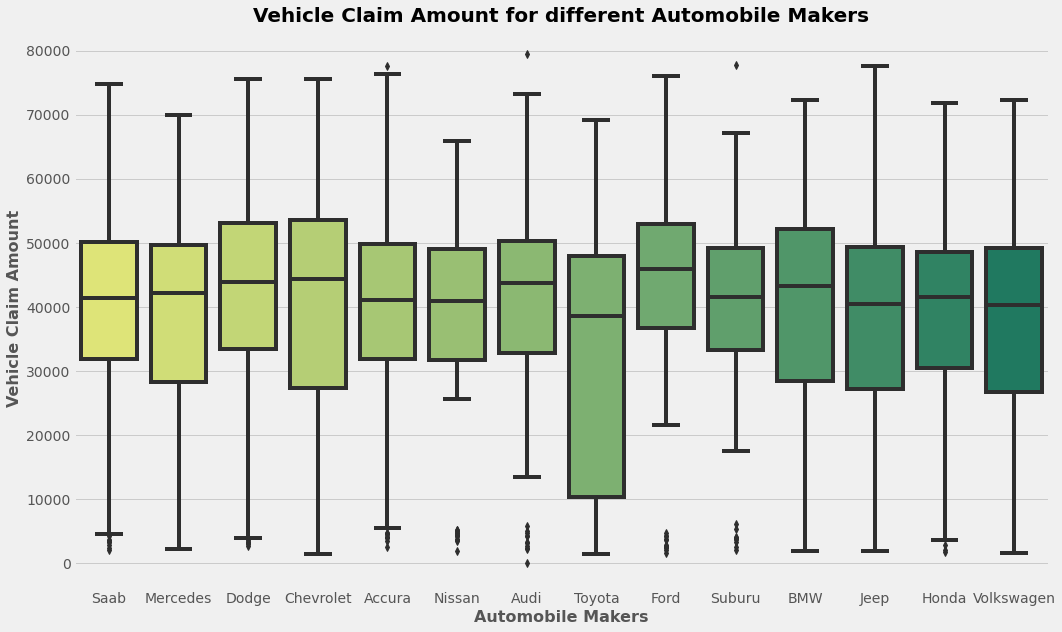

In [201]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

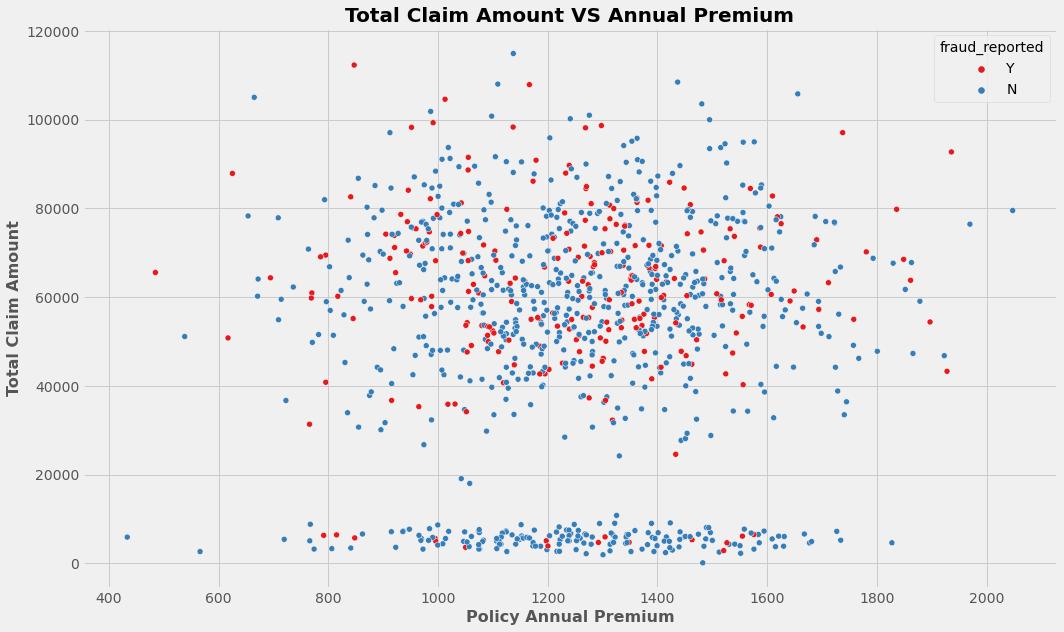

In [209]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

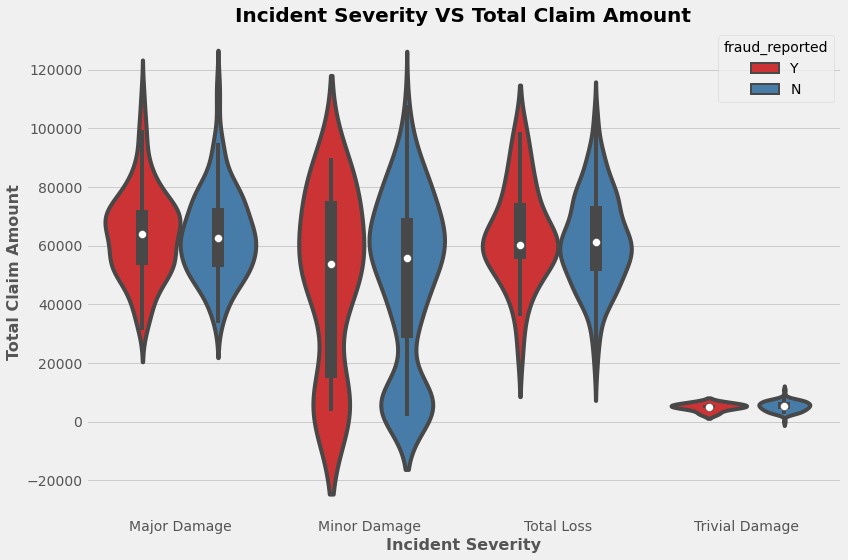

In [214]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(df['incident_severity'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

In [39]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age,age_bins
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,250,500,17,10,2014,25,1,11,41-50
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,250,500,27,6,2006,21,1,8,41-50
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,100,300,9,6,2000,22,2,8,21-30
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,250,500,25,5,1990,1,10,1,41-50
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,500,1000,6,6,2014,17,2,6,41-50


# Encoding categorical data

In [103]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [104]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,1,2,17,10,2014,25,1,11
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,1,1,2,27,6,2006,21,1,8
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,0,1,9,6,2000,22,2,8
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,1,2,25,5,1990,1,10,1
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,2,0,6,6,2014,17,2,6


In [105]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental'], int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium']}

# Feature selection and Engineering

## 1. Outliers Detection and Removal

In [101]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [102]:
len(Numerical)

21

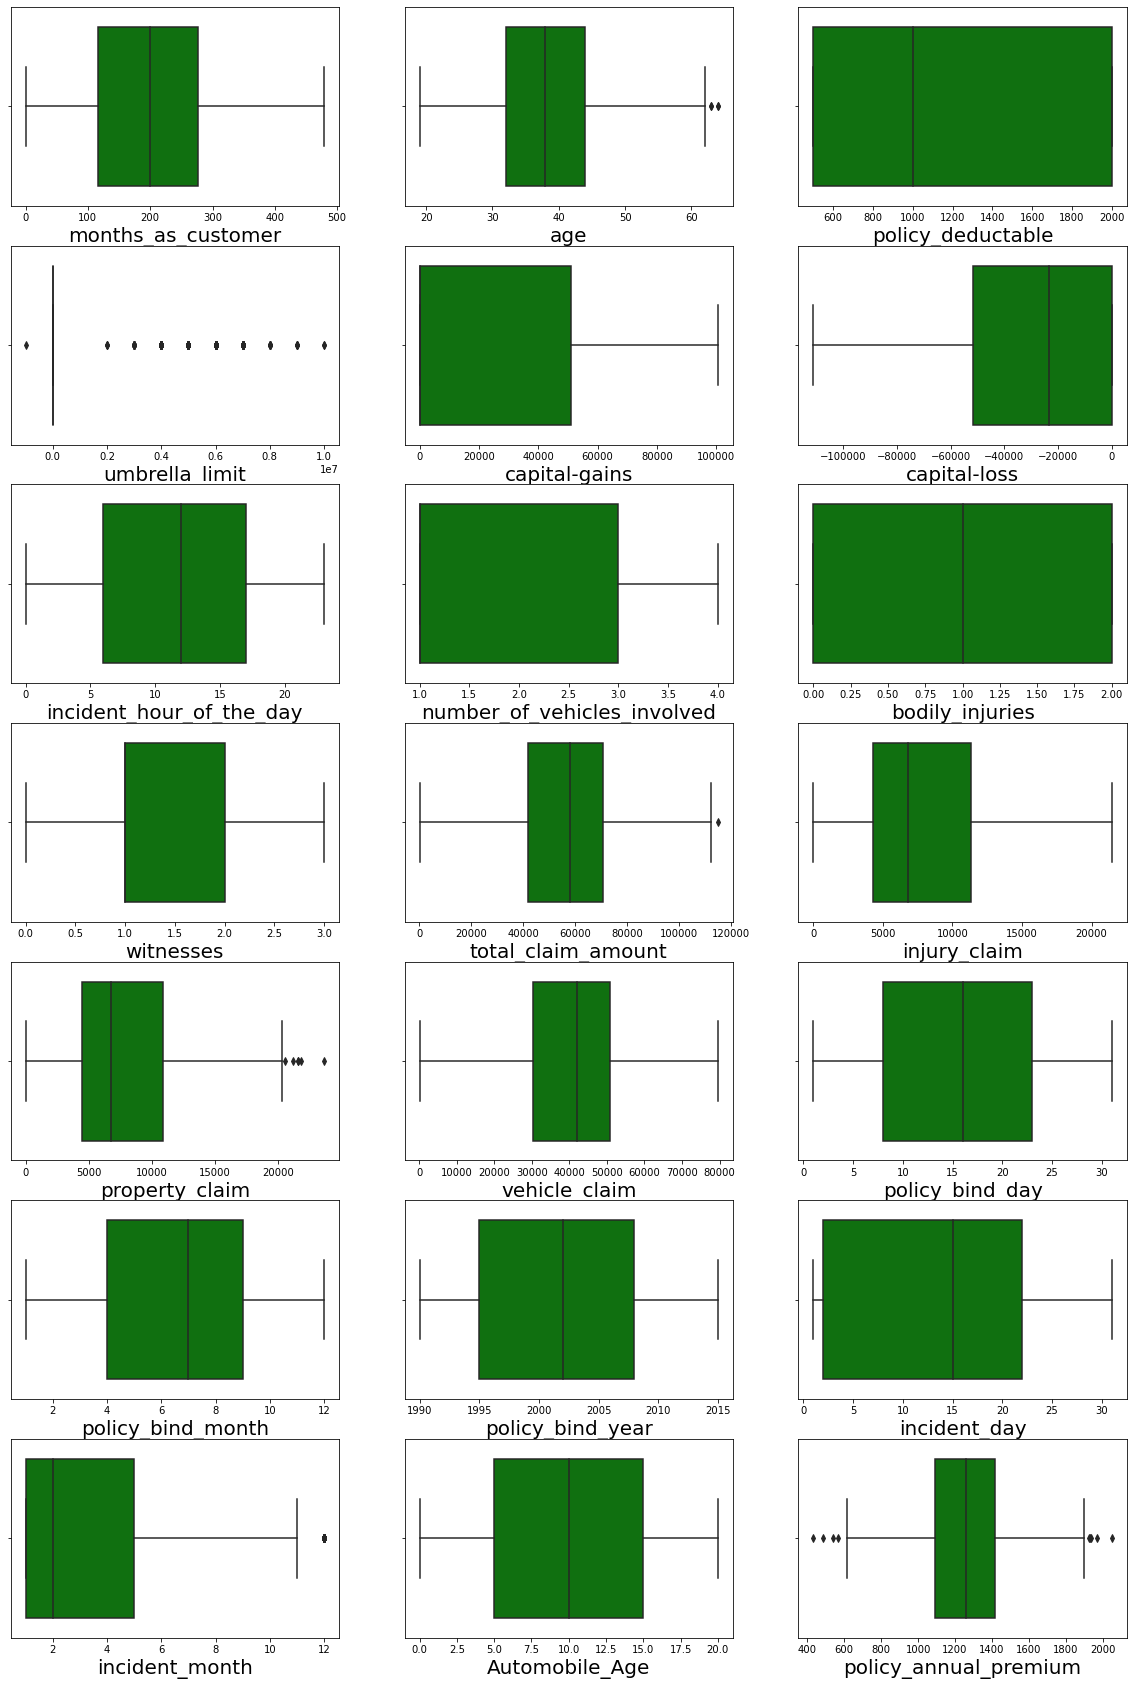

In [31]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b> From Boxplot we can see outliers exist dataset.</b>

### Outliers removal using Zscore method

In [106]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


## 2.  Skewness of features

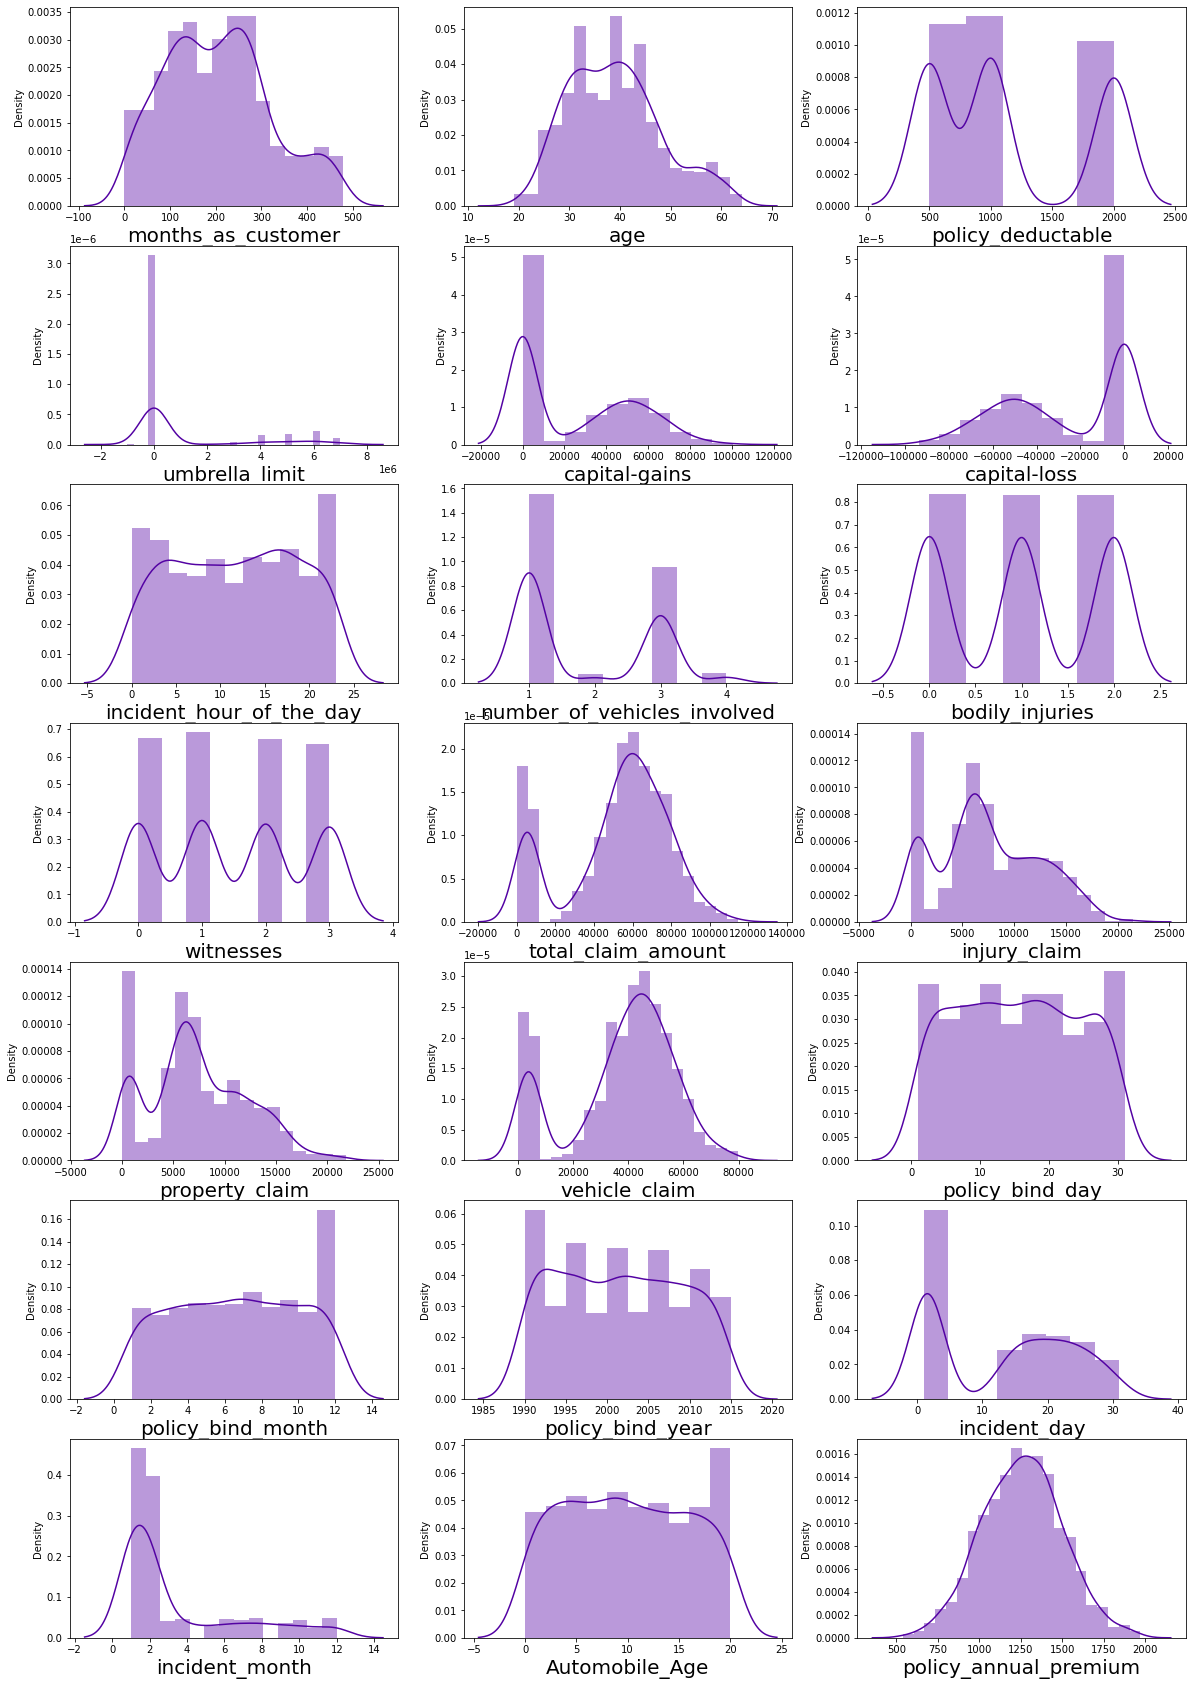

In [38]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

- **We also going to ignore sknewness in target feature.**

In [62]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.028152
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_day                   0.055443
incident_month                 1.388336
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

- **Out above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.**

- **We will use yeo-johnson method to transform negatively skewed data.**


In [107]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

#### Checking Skewness after transformation

In [64]:
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

**For 'total_claim_amount','vehicle_claim' skewness has not been removed but it got reduced**

## 3. Corrleation 

In [67]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
months_as_customer,1.000000,0.922960,-0.007183,0.031041,-0.003814,0.005374,0.059644,-0.000731,0.006925,-0.089358,0.071492,0.007468,0.023041,-0.016746,-0.073031,-0.064094,0.013782,0.015811,-0.006601,0.066198,0.011831,-0.000630,-0.007674,0.063574,-0.017200,0.059338,0.065062,0.036660,0.056360,0.049734,0.005130,0.021285,-0.021855,0.007121,0.050824,0.004207,-0.041914,-0.010538,0.019242,-0.000869
age,0.922960,1.000000,-0.020012,0.032036,0.005330,-0.003501,0.073790,0.001647,0.014798,-0.079099,0.076129,-0.004529,0.012860,-0.026286,-0.076325,-0.064396,0.018441,0.012644,-0.006685,0.083720,0.020391,-0.008239,-0.012254,0.056360,-0.018135,0.068448,0.077149,0.062375,0.059129,0.033757,0.015322,0.013279,-0.013323,0.011258,0.053147,0.014492,-0.031709,-0.005843,0.018221,-0.005594
policy_state,-0.007183,-0.020012,1.000000,0.017612,0.015089,-0.005472,-0.018002,-0.027173,-0.025357,-0.039501,-0.017060,0.068619,-0.031926,0.032373,0.049961,-0.028353,-0.014647,0.019456,-0.002809,0.021926,-0.045514,-0.013576,0.012097,0.025838,0.065316,-0.015056,-0.048188,-0.006420,-0.006411,0.010259,-0.018008,0.034587,0.001653,0.029007,-0.000583,0.073692,-0.003045,0.016049,0.027889,0.001160
policy_deductable,0.031041,0.032036,0.017612,1.000000,-0.008300,0.000404,-0.006977,0.014101,-0.053888,-0.001923,-0.019000,0.031673,-0.019601,-0.032291,-0.055984,-0.016363,0.002769,0.000647,-0.047304,0.064732,0.046331,0.013074,-0.037263,0.071709,0.036275,0.024385,0.038459,0.071031,0.004874,-0.028032,-0.002591,0.015774,0.009912,-0.014554,0.013395,-0.054208,-0.054041,-0.018115,-0.010288,-0.030569
policy_annual_premium,-0.003814,0.005330,0.015089,-0.008300,1.000000,-0.006430,0.041312,-0.021400,0.027827,-0.014226,0.004417,-0.006807,0.033133,0.051606,0.032604,-0.013911,-0.054425,0.048647,0.047771,-0.006448,-0.044544,0.076447,0.027837,0.003433,0.032413,-0.000944,-0.024119,-0.014073,0.009194,0.009311,-0.038226,-0.012686,0.032654,-0.001868,-0.032681,-0.031608,0.002433,0.018671,0.009544,0.042446
umbrella_limit,0.005374,-0.003501,-0.005472,0.000404,-0.006430,1.000000,0.018722,-0.024683,0.007597,-0.029333,0.103358,-0.029333,-0.018733,0.036416,0.018059,-0.006249,0.021137,-0.073135,0.023728,-0.016404,-0.039642,-0.082002,0.063239,-0.005987,-0.048166,-0.038177,-0.041490,-0.013011,-0.039300,0.017337,0.012066,0.050418,0.009524,0.032858,-0.031914,-0.004018,0.058646,-0.043920,0.034698,-0.015850
insured_sex,0.059644,0.073790,-0.018002,-0.006977,0.041312,0.018722,1.000000,0.010068,-0.007440,-0.020928,0.004488,-0.019824,-0.030319,0.009540,-0.019044,-0.021242,0.019423,-0.022522,0.009957,0.012904,0.018852,0.032636,-0.015199,0.039343,0.014179,-0.016933,0.008472,-0.008744,-0.023597,0.019996,-0.018657,0.020582,-0.003405,0.071995,0.047690,-0.003125,-0.031230,-0.017208,0.036916,0.033336
insured_education_level,-0.000731,0.001647,-0.027173,0.014101,-0.021400,-0.024683,0.010068,1.000000,-0.025394,0.025229,-0.028673,0.044276,0.037070,0.005854,-0.022368,-0.010929,-0.015500,-0.007821,-0.022502,-0.053983,0.003279,-0.050922,-0.017959,0.021747,0.055785,0.079642,0.086600,0.062230,0.072650,0.060043,0.042735,0.013116,0.008337,-0.005150,0.018977,-0.011963,0.016874,-0.051772,0.069564,-0.054438
insured_occupation,0.006925,0.014798,-0.025357,-0.053888,0.027827,0.007597,-0.007440,-0.025394,1.000000,-0.010375,-0.012135,0.000409,-0.016182,0.003755,0.012390,-0.000513,-0.000998,-0.020759,0.003112,

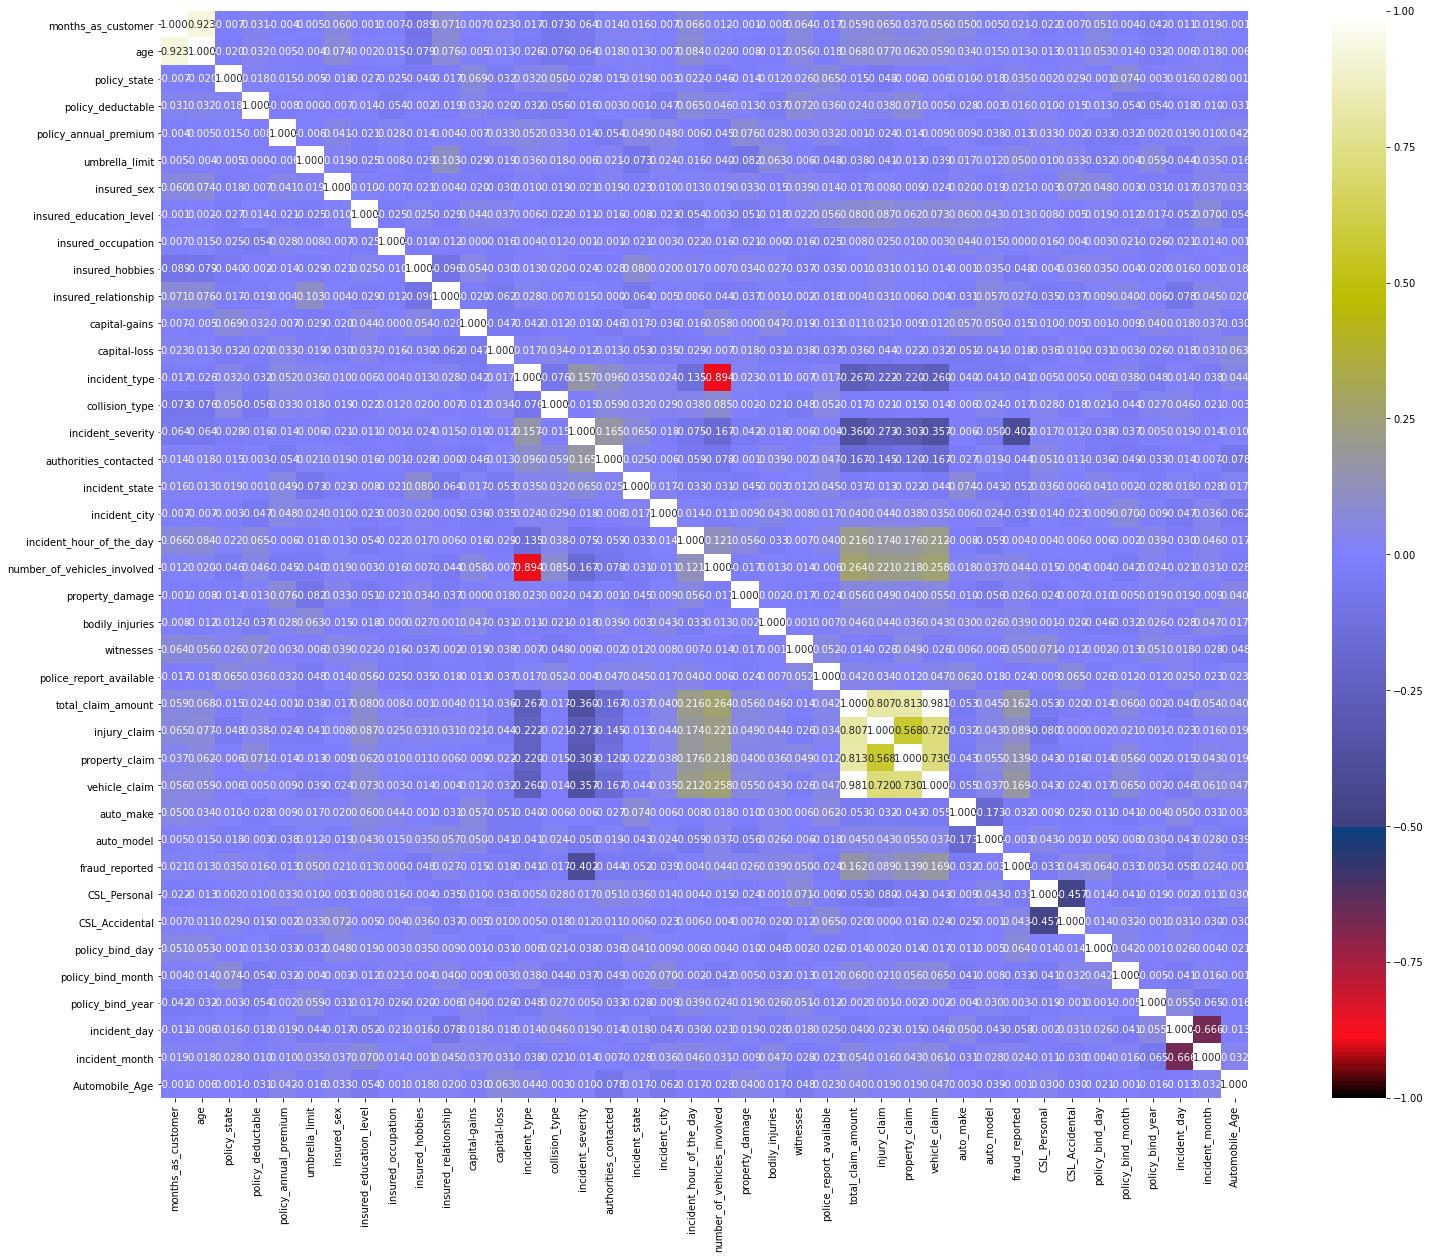

In [68]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

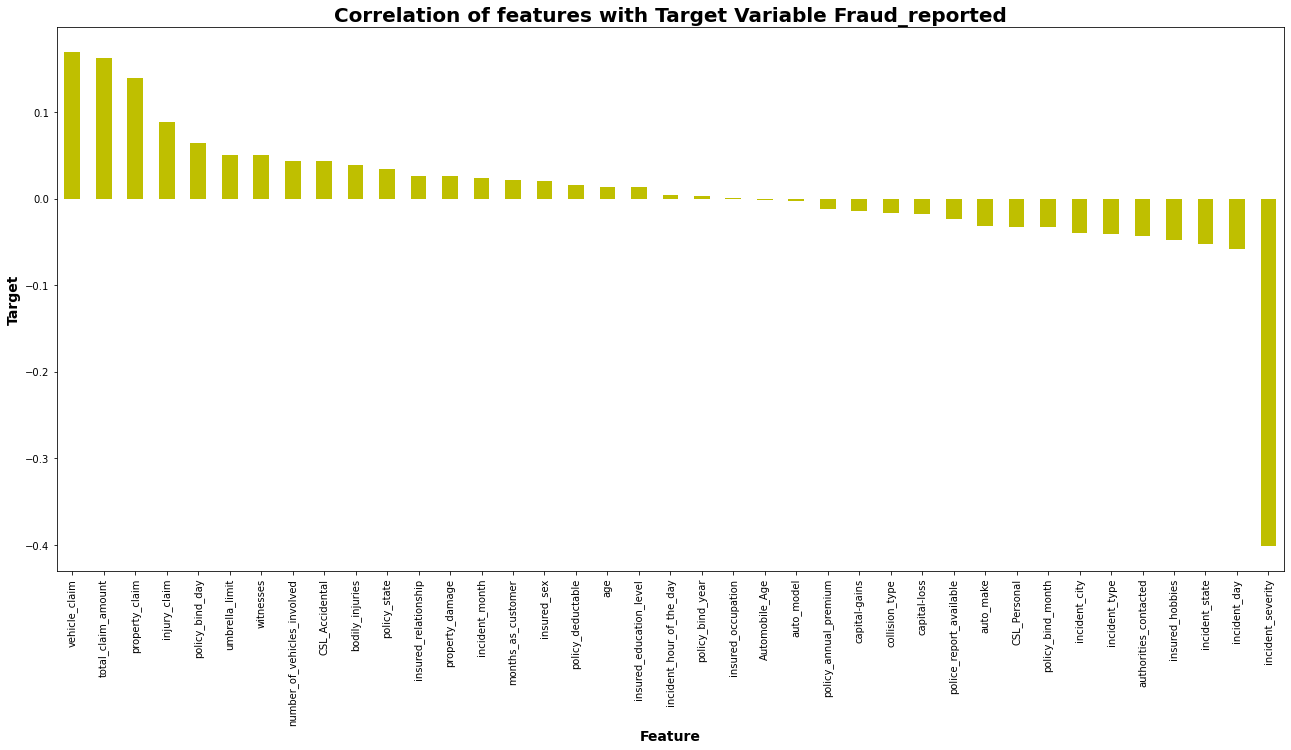

In [78]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

#### Observation:
- **incident_severity is correlated with target variable with correlation of 0.4. Other variable are poorly correlated with target variable.**
- Other variable are poorly correlated with target variable.
- injury_claim,property_claim,vehicle_claim are highly correlated with each other.
- **incident_hour_of_the_day is highly negative correlated with incident type.**

## 4. Balanceing Imbalanced target feature

In [110]:
df.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [111]:
from imblearn.over_sampling import SMOTE

In [112]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [113]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [114]:
Y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

<b><em> We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.</em></b>

## Standard Scaling

In [115]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

 ## 5. Checking Multicollinearity between features using variance_inflation_factor

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,7.532092,months_as_customer
1,7.495173,age
2,1.071769,policy_state
3,1.058563,policy_deductable
4,1.049535,policy_annual_premium
5,1.071370,umbrella_limit
6,1.087630,insured_sex
7,1.059495,insured_education_level
8,1.028722,insured_occupation
9,1.073167,insured_hobbies


#### Strategy to Address Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

<b> We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.  </b>


## PCA

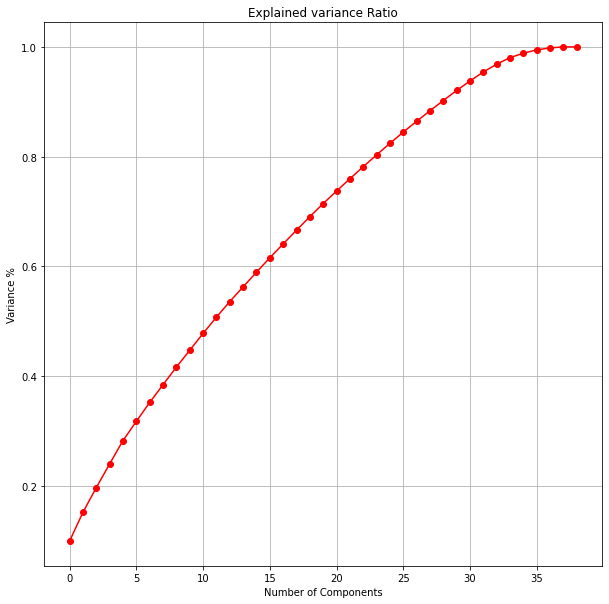

In [122]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data.  We shall pick the first 28 components for our prediction. </b>

In [123]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [127]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Machine Learning Model Building

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1036, 28)
Training target vector size: (1036,)
Test feature matrix size: (444, 28)
Test target vector size: (444,)


### Finding best Random state

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8108108108108109 on Random_state 9


In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8108108108108109


Confusion matrix of Logistics Regression : 
 [[182  45]
 [ 39 178]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       227
           1       0.80      0.82      0.81       217

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444



In [131]:
### Finding Optimal value of n_neighbors for KNN

In [132]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5067117097095317
RMSE value for k=  2 is: 0.4745789978762495
RMSE value for k=  3 is: 0.5263335701121742
RMSE value for k=  4 is: 0.488608983481412
RMSE value for k=  5 is: 0.532713603903433
RMSE value for k=  6 is: 0.5155247479663472
RMSE value for k=  7 is: 0.5675139399803956
RMSE value for k=  8 is: 0.5348233690070359
RMSE value for k=  9 is: 0.5773502691896257
RMSE value for k=  10 is: 0.5554804754071547
RMSE value for k=  11 is: 0.5792974931635606
RMSE value for k=  12 is: 0.5534494613840601
RMSE value for k=  13 is: 0.5734359849441164
RMSE value for k=  14 is: 0.5595203866375765
RMSE value for k=  15 is: 0.5831724359827805
RMSE value for k=  16 is: 0.5714687888035326
RMSE value for k=  17 is: 0.5946457799426509
RMSE value for k=  18 is: 0.5734359849441164
RMSE value for k=  19 is: 0.5927489783638191
RMSE value for k=  20 is: 0.5753964555687505


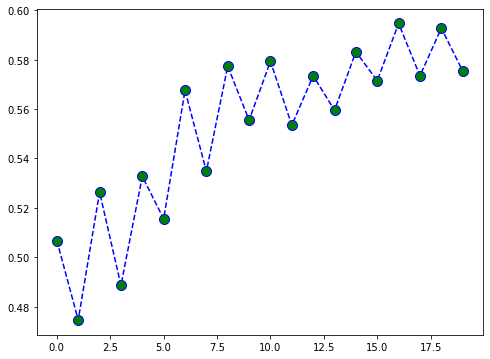

In [133]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Comment- 
At k=2, we get the minimum RMSE value which approximately 0.4745789978762495, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case


## Applying other classification algorithm

In [134]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8108108108108109


Confusion matrix : 
 [[182  45]
 [ 39 178]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       227
           1       0.80      0.82      0.81       217

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8333333333333334


Confusion matrix : 
 [[193  34]
 [ 40 177]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       227
           1       0.84      0.82      0.83       217

    accuracy                           0.83       444
   macro avg       0.83      0.83      0.83       444
weighted avg       0.83      0.83      0.83     

# CrossValidation :

In [135]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.59459459 0.68918919 0.81756757 0.81081081 0.87837838]
Mean Score : 0.7581081081081081
Std deviation : 0.1022393530777175




Cross Validation Score SVC() :

Score : [0.58783784 0.72297297 0.89189189 0.89864865 0.92905405]
Mean Score : 0.806081081081081
Std deviation : 0.13083705343199603




Cross Validation Score GaussianNB() :

Score : [0.57432432 0.70608108 0.86148649 0.875      0.89527027]
Mean Score : 0.7824324324324323
Std deviation : 0.12384602471552263




Cross Validation Score DecisionTreeClassifier() :

Score : [0.58783784 0.65540541 0.76689189 0.77027027 0.76351351]
Mean Score : 0.7087837837837838
Std deviation : 0.07433660832148685




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.68918919 0.71283784 0.75675676 0.79054054 0.78040541]
Mean Score : 0.745945945945946
Std deviation : 0.03901405414392448




Cross Validation Score RandomForestClassifier() :

Score : [0.60472973 0.70945946 0.8

# Hyper Parameter Tuning : GridSearchCV

In [136]:
from sklearn.model_selection import GridSearchCV

In [139]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [140]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.812 total time=   0.3s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.778 total time=   0.4s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.792 total time=   0.4s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples

[CV 4/5; 7/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.768 total time=   0.6s
[CV 5/5; 7/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300
[CV 5/5; 7/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.797 total time=   0.7s
[CV 1/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 1/5; 8/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.822 total time=   1.2s
[CV 2/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 2/5; 8/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.787 total time=   1.2s
[CV 3/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 

[CV 2/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.768 total time=   0.5s
[CV 3/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 3/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.754 total time=   0.5s
[CV 4/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 4/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.749 total time=   0.5s
[CV 5/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 5/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.812 total time=   0.4s
[CV 1/5; 15/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_est

[CV 5/5; 20/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.812 total time=   1.2s
[CV 1/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 1/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.827 total time=   0.2s
[CV 2/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 2/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.763 total time=   0.3s
[CV 3/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 3/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.807 total time=   0.2s
[CV 4/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=

[CV 3/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.792 total time=   1.0s
[CV 4/5; 27/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300
[CV 4/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.754 total time=   0.9s
[CV 5/5; 27/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300
[CV 5/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.802 total time=   0.8s
[CV 1/5; 28/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 28/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.812 total time=   1.0s
[CV 2/5; 28/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=

[CV 1/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.841 total time=   0.4s
[CV 2/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 2/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.768 total time=   0.4s
[CV 3/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.787 total time=   0.4s
[CV 4/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.763 total time=   0.5s
[CV 5/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=

[CV 4/5; 40/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.758 total time=   1.6s
[CV 5/5; 40/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 40/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.812 total time=   1.1s
[CV 1/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 41/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.832 total time=   0.1s
[CV 2/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 41/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.778 total time=   0.2s
[CV 3/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=

[CV 2/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.783 total time=   0.7s
[CV 3/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.773 total time=   0.7s
[CV 4/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.744 total time=   0.6s
[CV 5/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 5/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.802 total time=   0.7s
[CV 1/5; 48/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_est

[CV 5/5; 53/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.821 total time=   0.3s
[CV 1/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 1/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.851 total time=   0.6s
[CV 2/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 2/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.816 total time=   0.6s
[CV 3/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 3/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.821 total time=   0.6s
[CV 4/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=

[CV 3/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.816 total time=   1.0s
[CV 4/5; 60/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 4/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.763 total time=   1.6s
[CV 5/5; 60/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 5/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.826 total time=   1.4s
[CV 1/5; 61/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=100
[CV 1/5; 61/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=100;, score=0.812 total time=   0.3s
[CV 2/5; 61/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimato

[CV 1/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.832 total time=   0.9s
[CV 2/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 2/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.792 total time=   1.0s
[CV 3/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 3/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.807 total time=   1.1s
[CV 4/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 4/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.773 total time=   1.0s
[CV 5/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=

[CV 4/5; 73/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.758 total time=   0.2s
[CV 5/5; 73/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 5/5; 73/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.802 total time=   0.2s
[CV 1/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200
[CV 1/5; 74/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.827 total time=   0.5s
[CV 2/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200
[CV 2/5; 74/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.807 total time=   0.5s
[CV 3/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=

[CV 2/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.802 total time=   1.1s
[CV 3/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 3/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.807 total time=   1.1s
[CV 4/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 4/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.768 total time=   1.1s
[CV 5/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 5/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.807 total time=   1.1s
[CV 1/5; 81/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_esti

[CV 5/5; 86/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.841 total time=   0.6s
[CV 1/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 1/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.837 total time=   1.0s
[CV 2/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 2/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.792 total time=   0.8s
[CV 3/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 3/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.807 total time=   1.0s
[CV 4/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=

[CV 3/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.821 total time=   0.5s
[CV 4/5; 93/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100
[CV 4/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.773 total time=   0.5s
[CV 5/5; 93/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100
[CV 5/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.797 total time=   0.6s
[CV 1/5; 94/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200
[CV 1/5; 94/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200;, score=0.827 total time=   1.3s
[CV 2/5; 94/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_est

[CV 1/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.846 total time=   1.1s
[CV 2/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 2/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.821 total time=   1.2s
[CV 3/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 3/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.807 total time=   1.1s
[CV 4/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 4/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.778 total time=   1.1s
[CV 5/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_est

[CV 4/5; 106/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.778 total time=   0.8s
[CV 5/5; 106/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200
[CV 5/5; 106/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.816 total time=   0.7s
[CV 1/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300
[CV 1/5; 107/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.812 total time=   1.0s
[CV 2/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300
[CV 2/5; 107/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.807 total time=   1.1s
[CV 3/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_est

[CV 2/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.816 total time=   0.3s
[CV 3/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 3/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.816 total time=   0.3s
[CV 4/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 4/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.763 total time=   0.3s
[CV 5/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 5/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.831 total time=   0.3s
[CV 1/5; 114/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_est

[CV 5/5; 119/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.816 total time=   1.0s
[CV 1/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 1/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.846 total time=   1.4s
[CV 2/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 2/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.807 total time=   1.2s
[CV 3/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 3/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.821 total time=   1.1s
[CV 4/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_est

[CV 3/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.807 total time=   0.4s
[CV 4/5; 126/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 4/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.768 total time=   0.5s
[CV 5/5; 126/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 5/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.826 total time=   0.4s
[CV 1/5; 127/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 1/5; 127/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.827 total time=   0.7s
[CV 2/5; 127/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=1

[CV 1/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.827 total time=   0.2s
[CV 2/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 2/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.807 total time=   0.2s
[CV 3/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 3/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.826 total time=   0.2s
[CV 4/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.763 total time=   0.2s
[CV 5/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_est

[CV 4/5; 139/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.787 total time=   0.7s
[CV 5/5; 139/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300
[CV 5/5; 139/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.816 total time=   0.7s
[CV 1/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400
[CV 1/5; 140/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.832 total time=   1.0s
[CV 2/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400
[CV 2/5; 140/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.807 total time=   0.9s
[CV 3/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_est

[CV 2/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.778 total time=   0.4s
[CV 3/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 3/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.787 total time=   0.4s
[CV 4/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 4/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.749 total time=   0.4s
[CV 5/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 5/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.816 total time=   0.5s
[CV 1/5; 147/288] START criterion=entropy, max_depth=10, max_features=auto, mi

[CV 4/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.768 total time=   1.1s
[CV 5/5; 152/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.816 total time=   1.0s
[CV 1/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 153/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.846 total time=   0.2s
[CV 2/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 2/5; 153/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.773 total time=   0.2s
[CV 3/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, mi

[CV 1/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.827 total time=   0.7s
[CV 2/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 2/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.792 total time=   0.8s
[CV 3/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 3/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.787 total time=   0.8s
[CV 4/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.773 total time=   0.9s
[CV 5/5; 159/288] START criterion=entropy, max_depth=10, max_features=a

[CV 3/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.802 total time=   0.2s
[CV 4/5; 165/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.754 total time=   0.2s
[CV 5/5; 165/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 5/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.2s
[CV 1/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 1/5; 166/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.5s
[CV 2/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, mi

[CV 5/5; 171/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.812 total time=   0.6s
[CV 1/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.827 total time=   1.0s
[CV 2/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 2/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.773 total time=   1.0s
[CV 3/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 3/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.792 total time=   0.9s
[CV 4/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, mi

[CV 2/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.773 total time=   0.5s
[CV 3/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.787 total time=   0.4s
[CV 4/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.773 total time=   0.4s
[CV 5/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 5/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.778 total time=   0.4s
[CV 1/5; 179/288] START criterion=entropy, max_depth=10, max_features=log2, mi

[CV 4/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.754 total time=   0.8s
[CV 5/5; 184/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.792 total time=   0.9s
[CV 1/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.822 total time=   0.1s
[CV 2/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.787 total time=   0.1s
[CV 3/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, mi

[CV 1/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.822 total time=   0.7s
[CV 2/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 2/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.773 total time=   0.7s
[CV 3/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.802 total time=   0.7s
[CV 4/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.749 total time=   0.7s
[CV 5/5; 191/288] START criterion=entropy, max_depth=10, max_features=l

[CV 3/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.816 total time=   0.2s
[CV 4/5; 197/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100
[CV 4/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.768 total time=   0.3s
[CV 5/5; 197/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100
[CV 5/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.802 total time=   0.3s
[CV 1/5; 198/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 1/5; 198/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.841 total time=   0.5s
[CV 2/5; 198/288] START criterion=entropy, max_depth=20, max_features=auto, mi

[CV 5/5; 203/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.826 total time=   1.7s
[CV 1/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 1/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.837 total time=   2.3s
[CV 2/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 2/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.792 total time=   1.6s
[CV 3/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 3/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.826 total time=   1.2s
[CV 4/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, mi

[CV 2/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.812 total time=   0.6s
[CV 3/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 3/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.836 total time=   0.6s
[CV 4/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 4/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.778 total time=   0.6s
[CV 5/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 5/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.826 total time=   0.6s
[CV 1/5; 211/288] START criterion=entropy, max_depth=20, max_features=sqrt, mi

[CV 4/5; 216/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.754 total time=   1.2s
[CV 5/5; 216/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 5/5; 216/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.831 total time=   1.2s
[CV 1/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 1/5; 217/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.832 total time=   0.2s
[CV 2/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 2/5; 217/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.787 total time=   0.2s
[CV 3/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, mi

[CV 1/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.827 total time=   0.8s
[CV 2/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 2/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.797 total time=   0.8s
[CV 3/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 3/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.821 total time=   0.9s
[CV 4/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 4/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.763 total time=   0.8s
[CV 5/5; 223/288] START criterion=entropy, max_depth=20, max_features=s

[CV 3/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.2s
[CV 4/5; 229/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.773 total time=   0.2s
[CV 5/5; 229/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100
[CV 5/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.807 total time=   0.2s
[CV 1/5; 230/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200
[CV 1/5; 230/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.841 total time=   0.5s
[CV 2/5; 230/288] START criterion=entropy, max_depth=20, max_features=log2, mi

[CV 5/5; 235/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.821 total time=   1.3s
[CV 1/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 1/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.841 total time=   1.8s
[CV 2/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 2/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.816 total time=   1.8s
[CV 3/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 3/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.812 total time=   2.4s
[CV 4/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, mi

[CV 2/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.797 total time=   0.8s
[CV 3/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 3/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.797 total time=   0.6s
[CV 4/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 4/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.763 total time=   0.6s
[CV 5/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 5/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.821 total time=   0.6s
[CV 1/5; 243/288] START criterion=entropy, max_depth=30, max_features=auto, mi

[CV 4/5; 248/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.778 total time=   1.3s
[CV 5/5; 248/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 248/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.812 total time=   1.3s
[CV 1/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 249/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.817 total time=   0.3s
[CV 2/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100
[CV 2/5; 249/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.797 total time=   0.2s
[CV 3/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, mi

[CV 1/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.827 total time=   0.8s
[CV 2/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 2/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.787 total time=   0.8s
[CV 3/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 3/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.802 total time=   0.8s
[CV 4/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.773 total time=   0.8s
[CV 5/5; 255/288] START criterion=entropy, max_depth=30, max_features=a

[CV 3/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.821 total time=   0.2s
[CV 4/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.783 total time=   0.2s
[CV 5/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 5/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.831 total time=   0.2s
[CV 1/5; 262/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 1/5; 262/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.841 total time=   0.6s
[CV 2/5; 262/288] START criterion=entropy, max_depth=30, max_features=sqrt, mi

[CV 5/5; 267/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.792 total time=   1.0s
[CV 1/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.837 total time=   1.5s
[CV 2/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 2/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.792 total time=   1.5s
[CV 3/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 3/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.807 total time=   1.5s
[CV 4/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, mi

[CV 2/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.812 total time=   0.8s
[CV 3/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.845 total time=   0.8s
[CV 4/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.787 total time=   0.8s
[CV 5/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 5/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.812 total time=   0.8s
[CV 1/5; 275/288] START criterion=entropy, max_depth=30, max_features=log2, mi

[CV 4/5; 280/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.792 total time=   1.7s
[CV 5/5; 280/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 280/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.816 total time=   1.6s
[CV 1/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 281/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.822 total time=   0.3s
[CV 2/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 281/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.778 total time=   0.3s
[CV 3/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, mi

[CV 1/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.837 total time=   0.8s
[CV 2/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 2/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.797 total time=   1.0s
[CV 3/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.812 total time=   0.8s
[CV 4/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.783 total time=   1.2s
[CV 5/5; 287/288] START criterion=entropy, max_depth=30, max_features=l

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [141]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 200}

# Final Model

In [142]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8468468468468469


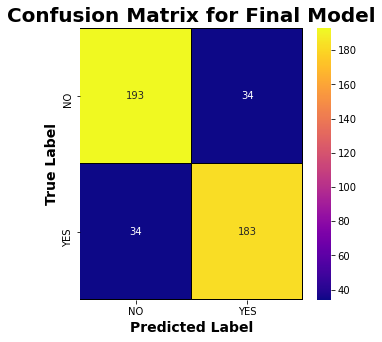

In [150]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

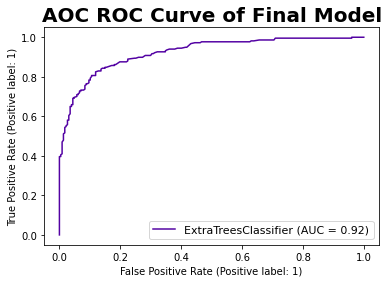

Auc Score :
 0.8467691183337055


In [149]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [144]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']

## Predicting the Final Model

In [151]:
# Prediction
prediction = Final_mod.predict(X_test)

In [152]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
